# Huggingface Pipelines

available tasks are ['audio-classification', 'automatic-speech-recognition', 'conversational', 'depth-estimation', 'document-question-answering', 'feature-extraction', 'fill-mask', 'image-classification', 'image-segmentation', 'image-to-text', 'mask-generation', 'ner', 'object-detection', 'question-answering', 'sentiment-analysis', 'summarization', 'table-question-answering', 'text-classification', 'text-generation', 'text2text-generation', 'token-classification', 'translation', 'video-classification', 'visual-question-answering', 'vqa', 'zero-shot-audio-classification', 'zero-shot-classification', 'zero-shot-image-classification', 'zero-shot-object-detection', 'translation_XX_to_YY']

In [2]:
# https://colab.research.google.com/github/huggingface/notebooks/blob/main/examples/image_classification.ipynb
%pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.1 MB/s eta 0:00:00


In [13]:
from transformers import pipeline, AutoModel, AutoImageProcessor #, AutoModelForImageClassification
from PIL import Image
import requests

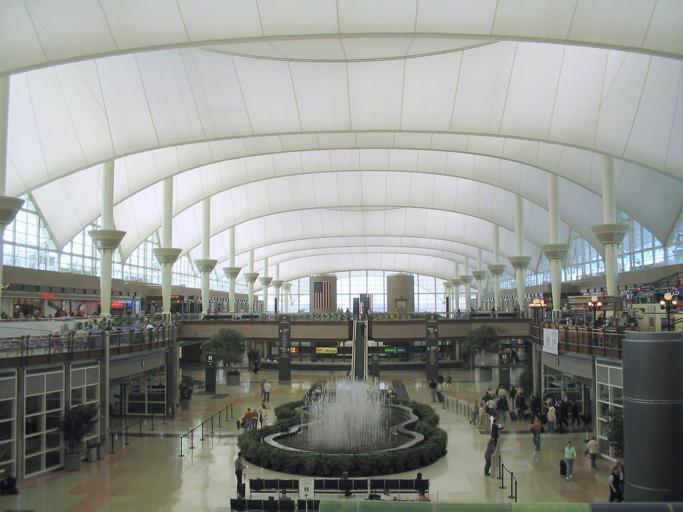

In [12]:
# url = 'https://huggingface.co/nielsr/convnext-tiny-finetuned-eurostat/resolve/main/forest.png'
url = "https://datasets-server.huggingface.co/assets/scene_parse_150/--/scene_parsing/train/0/image/image.jpg"
image = Image.open(requests.get(url, stream=True).raw)
image

In [25]:
# repo_name = "nielsr/swin-tiny-patch4-window7-224-finetuned-eurosat"
repo_name = "nvidia/mit-B0"
# model = AutoModelForImageClassification.from_pretrained(repo_name)
model = AutoModel.from_pretrained(repo_name)
type(model)

transformers.models.segformer.modeling_segformer.SegformerModel

In [ ]:
image_processor = AutoImageProcessor.from_pretrained(model)

In [30]:
# pipe = pipeline("image-classification", "nielsr/swin-tiny-patch4-window7-224-finetuned-eurosat")
pipe = pipeline("image-classification", repo_name)
pipe(image)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


[{'score': 0.19162261486053467, 'label': 'planetarium'},
 {'score': 0.04755150526762009, 'label': 'library'},
 {'score': 0.03319636732339859, 'label': 'prison, prison house'},
 {'score': 0.01939302682876587,
  'label': 'bannister, banister, balustrade, balusters, handrail'},
 {'score': 0.017692238092422485,
  'label': 'coil, spiral, volute, whorl, helix'}]

In [33]:
pipe = pipeline("image-segmentation", repo_name)
res = pipe(image)

Some weights of SegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/mit-B0 and are newly initialized: ['decode_head.batch_norm.running_mean', 'decode_head.linear_c.2.proj.weight', 'decode_head.linear_c.3.proj.bias', 'decode_head.batch_norm.num_batches_tracked', 'decode_head.classifier.bias', 'decode_head.linear_fuse.weight', 'decode_head.linear_c.0.proj.weight', 'decode_head.linear_c.1.proj.weight', 'decode_head.linear_c.3.proj.weight', 'decode_head.batch_norm.running_var', 'decode_head.linear_c.0.proj.bias', 'decode_head.linear_c.1.proj.bias', 'decode_head.linear_c.2.proj.bias', 'decode_head.batch_norm.weight', 'decode_head.classifier.weight', 'decode_head.batch_norm.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configurat

In [39]:
pipe = pipeline("image-segmentation", model=model, feature_extractor=image_processor)
pipe(image)

The model 'SegformerModel' is not supported for image-segmentation. Supported models are ['DetrForSegmentation', 'BeitForSemanticSegmentation', 'Data2VecVisionForSemanticSegmentation', 'DPTForSemanticSegmentation', 'MobileNetV2ForSemanticSegmentation', 'MobileViTForSemanticSegmentation', 'MobileViTV2ForSemanticSegmentation', 'SegformerForSemanticSegmentation', 'UperNetForSemanticSegmentation', 'MaskFormerForInstanceSegmentation', 'Mask2FormerForUniversalSegmentation', 'OneFormerForUniversalSegmentation'].


ValueError: ignored

In [37]:
pipe = pipeline("semanticsegmentation", model=model, feature_extractor=image_processor)
pipe(image)

KeyError: ignored